# Exercise 4.9: Intro to Data Visualization with Python

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [3]:
# Set a PATH variable.

In [4]:
# Linux PATH - Sadly, my Linux system with 8GB of total RAM could not import the new df_ords_prior DataFrame.
# BUT, now I have moved again, to an AWS EC2 instance that should be able to handle this.

In [5]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [6]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

In [7]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM, so I migrated there.

In [8]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

# Read the ords_prods_merge_derived_columns.pkl file into DataFrame, ords_prods_merge , per Exercise 4.9 instructions

In [9]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared-Data', 'ords_prods_merge_derived_columns.pkl'))

In [10]:
ords_prods_merge.shape

(32404859, 26)

In [11]:
ords_prods_merge.head(2)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,price_range,price_range_loc,busiest_days,busiest_hours,max_order,loyalty_flag,avg_order,spending_flag,avg_order_frequency,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Mid-range product,Mid-range product,Regularly busy,Busiest hours,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Mid-range product,Mid-range product,Regularly busy,Regularly busy,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer


In [12]:
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

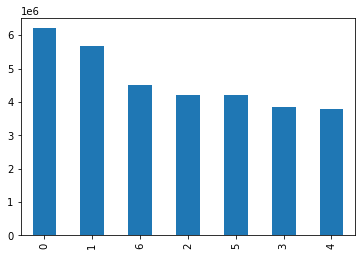

In [13]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [14]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

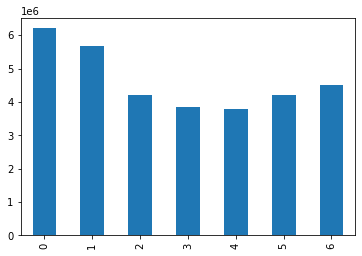

In [15]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

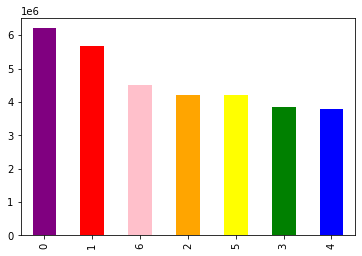

In [16]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

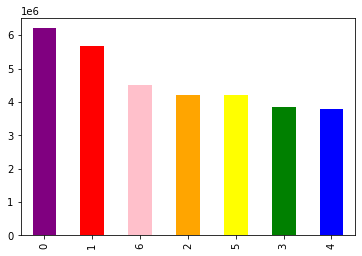

In [17]:
bar.figure

In [18]:
bar.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'bar_orders_dow.png'))

## At this point in Exercise 4.9, we discovered that we have some wildly skewed values in the 'prices' column, as shown by the charts below.  Contrary to the recommendation from the course author, I will keep the cleanup steps we take in this notebook, rather than backfill them to a notebook from a previous Exercise.  It makes more sense to keep the Exercise 4.9 work with the Exercise 4.9 notebook.

<AxesSubplot:ylabel='Frequency'>

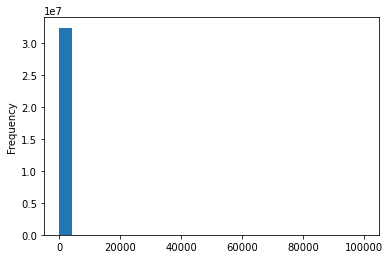

In [19]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [20]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [21]:
ords_prods_merge['prices'].mean()

11.980225638375474

In [22]:
ords_prods_merge['prices'].median()

7.4

In [23]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

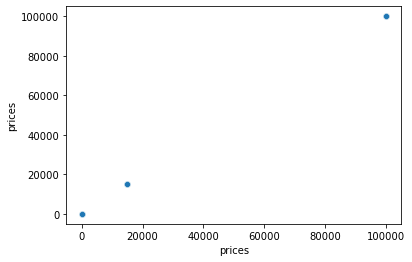

In [24]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [25]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,price_range,price_range_loc,busiest_days,busiest_hours,max_order,loyalty_flag,avg_order,spending_flag,avg_order_frequency,frequency_flag
13100147,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,...,High range,High-range product,Regularly busy,Regularly busy,40,Regular customer,108.648299,High spender,8.183673,Frequent customer
13100148,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,...,High range,High-range product,Regularly busy,Regularly busy,40,Regular customer,108.648299,High spender,8.183673,Frequent customer
13100149,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,...,High range,High-range product,Regularly busy,Regularly busy,4,New customer,1154.792308,High spender,11.000000,Regular customer
13100150,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,...,High range,High-range product,Busiest days,Regularly busy,4,New customer,1154.792308,High spender,11.000000,Regular customer
13100151,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,...,High range,High-range product,Busiest days,Regularly busy,16,Regular customer,114.426619,High spender,19.093525,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,...,High range,High-range product,Busiest days,Regularly busy,39,Regular customer,1106.743956,High spender,7.895604,Frequent customer
21786877,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,...,High range,High-range product,Busiest days,Regularly busy,39,Regular customer,1106.743956,High spender,7.895604,Frequent customer
21786878,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,...,High range,High-range product,Least busy days,Regularly busy,15,Regular customer,451.153540,High spender,4.597345,Frequent customer
21786879,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,...,High range,High-range product,Least busy days,Regularly busy,12,Regular customer,1178.381871,High spender,11.286550,Regular customer


In [26]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [27]:
ords_prods_merge['prices'].max()

25.0

In [28]:
# Now that we've cleaned some bad 'prices' values, I'm going to store the DataFram in a new file.
# This helps document the history.

In [29]:
ords_prods_merge.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'ords_prods_merge_derived_columns_cleaned_prices.pkl'))

In [30]:
# Retrying the previous histogram.  Much nicer results this time.

<AxesSubplot:ylabel='Frequency'>

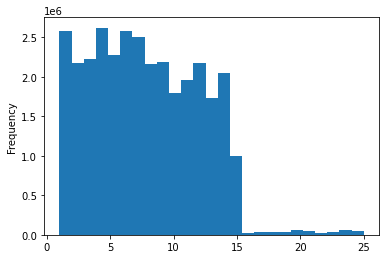

In [31]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [32]:
# Same histogram, increased granularity (i.e. more buckets).

<AxesSubplot:ylabel='Frequency'>

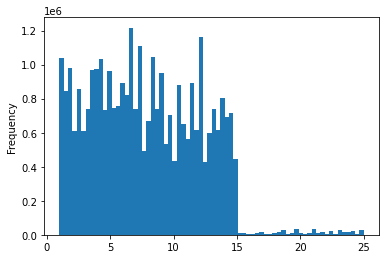

In [33]:
ords_prods_merge['prices'].plot.hist(bins = 70)

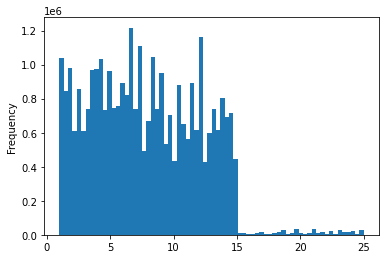

In [34]:
histogram = ords_prods_merge['prices'].plot.hist(bins = 70)

In [35]:
histogram.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'histogram_prices.png'))

## Here we start working with data sampling.

In [36]:
# First, we use a seed of 4 for supposed reproducibility.
# Then, we will produce a list of randomized values between 0 and 1, for
# which the value is True if it is less than or equal to 0.7 and False if
# it is not.  This gives us a distribution of 70% True and 30% False.
# The list contains the same number of values as our DataFrame has rows.

In [37]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [38]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [39]:
# Playing with np.random.

In [40]:
np.random.rand()

0.9354668599465477

In [41]:
np.random.rand(43)

array([0.06557465, 0.85698584, 0.24456371, 0.22683171, 0.17068366,
       0.27008946, 0.52534234, 0.83151571, 0.78153402, 0.0164016 ,
       0.99588525, 0.68895442, 0.9491469 , 0.63012328, 0.9192488 ,
       0.87788077, 0.3936537 , 0.64745848, 0.73786691, 0.61518855,
       0.33319665, 0.04099601, 0.88078504, 0.46206509, 0.51543275,
       0.51724006, 0.90712175, 0.03869044, 0.15665773, 0.07377143,
       0.12977092, 0.95135392, 0.17837864, 0.24763711, 0.80477363,
       0.02890268, 0.57044404, 0.28380554, 0.57596866, 0.68143843,
       0.46876222, 0.51842125, 0.22892868])

## Hmm, np.random.rand() (and np.random.rand(some_value)) give me different results each time.  Doesn't the Exercise say that the use of np.random.seed(4) will prevent this?

In [42]:
# Combine the list of randomized True/False values with our DataFrame,
# storing 70% of the DataFrame (where the row is associated with 'True')
# in a new DF called, 'big'...

In [43]:
big = ords_prods_merge[dev]

In [44]:
# ...while storing the remaining 30% of our DataFrame (the rows associated)
# with 'False') in a new DF called, 'small'.

In [45]:
small = ords_prods_merge[~dev]

## Remember how a tilde (~) is used to represent 'NOT', rather than a bang (!).  Hooray for Python.
### I wonder if this has anything to do with the matplotlib.pyplot.savefig function not handling tildes in the file path as expected.

In [46]:
# Let's check out the new DataFrames.

In [47]:
big.describe()

,Unnamed: 0,product_id,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_order,avg_order_frequency
count,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268019e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07
mean,2.559843e+04,2.559673e+04,7.119746e+01,9.919779e+00,7.790942e+00,1.710927e+06,1.029426e+05,1.714546e+01,2.738675e+00,1.342515e+01,1.039078e+01,8.352838e+00,5.895513e-01,3.305637e+01,1.199205e+01,1.039091e+01
std,1.408522e+04,1.408367e+04,3.820803e+01,6.281026e+00,4.241507e+00,9.873228e+05,5.946922e+04,1.754105e+01,2.090055e+00,4.245914e+00,8.916723e+00,7.126775e+00,4.919152e-01,2.515735e+01,8.367147e+01,5.022990e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.354100e+04,1.354100e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.561400e+05,5.142600e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387500e+00,6.585009e+00
50%,2.529600e+04,2.529500e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711394e+06,1.026170e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824895e+00,9.348837e+00
75%,3.795100e+04,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565697e+06,1.544060e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254297e+00,1.359247e+01
max,4.969200e+04,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,2.970297e+01


In [48]:
small.describe()

,Unnamed: 0,product_id,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_order,avg_order_frequency
count,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.719546e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06
mean,2.560489e+04,2.560318e+04,7.119298e+01,9.919823e+00,7.791115e+00,1.710321e+06,1.029247e+05,1.713494e+01,2.739315e+00,1.342515e+01,1.039708e+01,8.351867e+00,5.896714e-01,3.304236e+01,1.195264e+01,1.039679e+01
std,1.408632e+04,1.408477e+04,3.821923e+01,6.282556e+00,4.242515e+00,9.872428e+05,5.945883e+04,1.752195e+01,2.090128e+00,4.247467e+00,8.920396e+00,7.127762e+00,4.918934e-01,2.515034e+01,8.223206e+01,5.026279e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.354800e+04,1.354800e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554910e+05,5.141000e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.386932e+00,6.585132e+00
50%,2.533100e+04,2.533000e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710198e+06,1.026090e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824403e+00,9.355231e+00
75%,3.796300e+04,3.795900e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565010e+06,1.543720e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.253741e+00,1.359813e+01
max,4.969200e+04,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.400000e+02,1.000000e+00,9.900000e+01,1.500694e+04,2.970297e+01


In [49]:
# Wow, the describe() outputs for the two new DFs look close to identical outside of their counts.  Sampling works!

In [50]:
# More sanity checking, suggested by the Exercise, but with a one-liner to compare them mathematically.

In [51]:
len(ords_prods_merge) - (len(big) + len(small))

0

In [52]:
# As suggested, speed processing up further by looking only at those columns actually needed for our chart.

In [53]:
df_2 = small[['orders_day_of_week','prices']]

In [54]:
# Sanity-checks.

In [55]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


In [56]:
df_2.describe()

,orders_day_of_week,prices
count,9.721098e+06,9.719546e+06
mean,2.739315e+00,7.791115e+00
std,2.090128e+00,4.242515e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


In [57]:
len(small) - len(df_2)

0

## Now, finally, the line plot, using our optimized DataFrame, 'df_2':
## NB:  I still have 'order_dow' for a column name, rather than the 'orders_day_of_week' that the Exercise uses.
# UPDATE:  YES, I MESSED UP IN PREVIOUS SCRIPTS AND RELOADED THE ORIGINAL, NON-WRANGLED orders.csv.  I am fixing this all now.

In [58]:
# Wow, this still took 1.75 minutes to execute, even with the reduced dataframe.

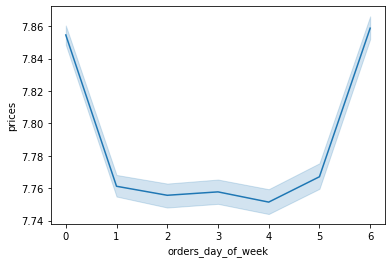

In [59]:
line_df_30 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [60]:
df_3 = big[['orders_day_of_week','prices']]

In [61]:
df_4 = ords_prods_merge[['orders_day_of_week','prices']]

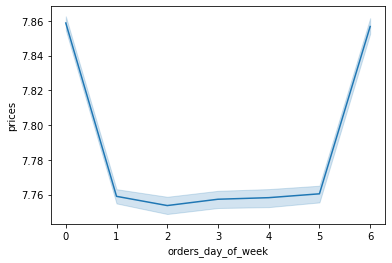

In [62]:
line_df_70 = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

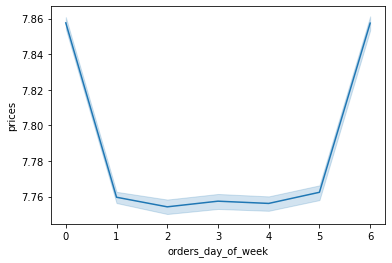

In [63]:
line_df_full = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')